#### 1. Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

#### 2. Load Data

In [2]:
df = pd.read_csv("Match_dataset.csv")
result = pd.read_csv("match_results.csv")

In [3]:
df = pd.merge(df,result)

In [4]:
df.isnull().sum()

Match_ID                 0
Date                     0
Venue                    0
Team_A                   0
Team_B                   0
Stage                    0
Team_A_Ranking           0
Team_B_Ranking           0
Team_A_Form              0
Team_B_Form              0
HeadToHead_A_Wins        0
HeadToHead_B_Wins        0
Venue_HomeAdvantage_A    0
Venue_HomeAdvantage_B    0
Pitch_Type               0
Avg_T20_Score_Venue      0
Toss_Winner              0
Toss_Decision            0
Team_A_Tech_Index        0
Team_B_Tech_Index        0
Match_Total              0
Winner                   0
dtype: int64

In [5]:
df.duplicated().sum()

0

#### EDA

In [6]:
df.columns

Index(['Match_ID', 'Date', 'Venue', 'Team_A', 'Team_B', 'Stage',
       'Team_A_Ranking', 'Team_B_Ranking', 'Team_A_Form', 'Team_B_Form',
       'HeadToHead_A_Wins', 'HeadToHead_B_Wins', 'Venue_HomeAdvantage_A',
       'Venue_HomeAdvantage_B', 'Pitch_Type', 'Avg_T20_Score_Venue',
       'Toss_Winner', 'Toss_Decision', 'Team_A_Tech_Index',
       'Team_B_Tech_Index', 'Match_Total', 'Winner'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Match_ID               600 non-null    object 
 1   Date                   600 non-null    object 
 2   Venue                  600 non-null    object 
 3   Team_A                 600 non-null    object 
 4   Team_B                 600 non-null    object 
 5   Stage                  600 non-null    object 
 6   Team_A_Ranking         600 non-null    int64  
 7   Team_B_Ranking         600 non-null    int64  
 8   Team_A_Form            600 non-null    float64
 9   Team_B_Form            600 non-null    float64
 10  HeadToHead_A_Wins      600 non-null    int64  
 11  HeadToHead_B_Wins      600 non-null    int64  
 12  Venue_HomeAdvantage_A  600 non-null    int64  
 13  Venue_HomeAdvantage_B  600 non-null    int64  
 14  Pitch_Type             600 non-null    object 
 15  Avg_T2

In [8]:
numeric_df = df.select_dtypes(include=['int64','float64'])
categorical = df.select_dtypes(include=["object"])

In [9]:
numeric_df.corr()

,Team_A_Ranking,Team_B_Ranking,Team_A_Form,Team_B_Form,HeadToHead_A_Wins,HeadToHead_B_Wins,Venue_HomeAdvantage_A,Venue_HomeAdvantage_B,Avg_T20_Score_Venue,Team_A_Tech_Index,Team_B_Tech_Index,Match_Total
Team_A_Ranking,1.000000,-0.053394,-0.775727,0.073282,-0.450794,0.378335,-0.377630,0.039433,0.030217,-0.985727,0.064559,0.005025
Team_B_Ranking,-0.053394,1.000000,0.059601,-0.759607,0.393366,-0.368099,0.032001,-0.224920,-0.048271,0.057233,-0.984780,0.005658
Team_A_Form,-0.775727,0.059601,1.000000,-0.103178,0.365741,-0.279586,0.286373,-0.079575,-0.045141,0.846791,-0.069087,-0.039102
Team_B_Form,0.073282,-0.759607,-0.103178,1.000000,-0.311649,0.270840,-0.055855,0.184261,0.068719,-0.082455,0.829417,0.003997
HeadToHead_A_Wins,-0.450794,0.393366,0.365741,-0.311649,1.000000,0.062405,0.143179,-0.113630,-0.033700,0.449969,-0.397524,-0.017210
HeadToHead_B_Wins,0.378335,-0.368099,-0.279586,0.270840,0.062405,1.000000,-0.142795,0.057695,0.035992,-0.366369,0.363719,0.027271
Venue_HomeAdvantage_A,-0.377630,0.032001,0.286373,-0.055855,0.143179,-0.142795,1.000000,-0.057935,-0.010912,0.374253,-0.039877,0.049216
Venue_HomeAdvantage_B,0.039433,-0.224920,-0.079575,0.184261,-0.113630,0.057695,-0.057935,1.000000,-0.044022,-0.052734,0.225641,0.075055
Avg_T20_Score_Venue,0.030217,-0.048271,-0.045141,0.068719,-0.033700,0.035992,-0.010912,-0.044022,1.000000,-0.017484,0.076561,0.442312
Team_A_Tech_Index,-0.985727,0.057233,0.846791,-0.082455,0.449969,-0.366369,0.374253,-0.052734,-0.017484,1.000000,-0.067547,-0.005487


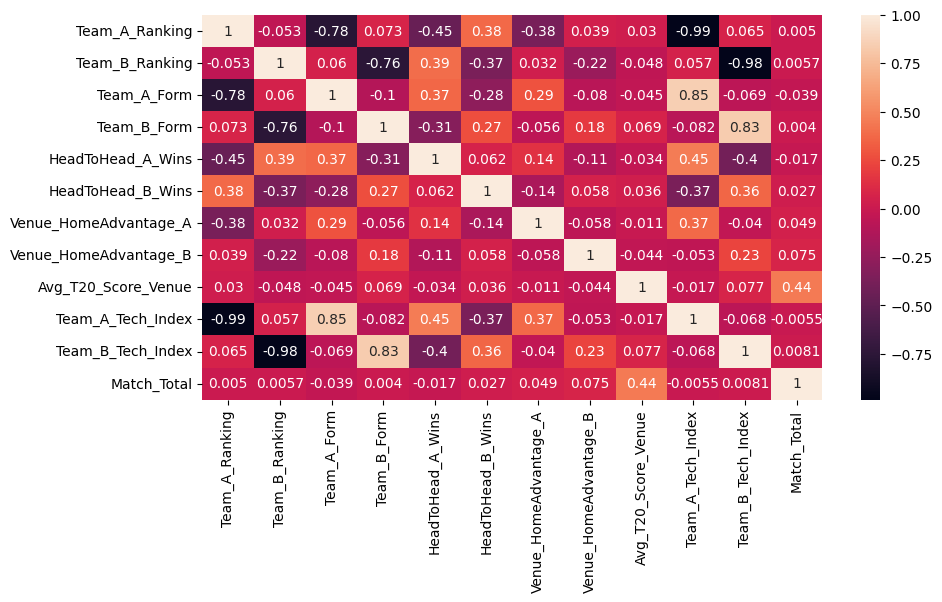

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

In [11]:
df['Winner'].value_counts()

Winner
Team_A    318
Team_B    282
Name: count, dtype: int64

In [12]:
df.head()

,Match_ID,Date,Venue,Team_A,Team_B,Stage,Team_A_Ranking,Team_B_Ranking,Team_A_Form,Team_B_Form,...,Venue_HomeAdvantage_A,Venue_HomeAdvantage_B,Pitch_Type,Avg_T20_Score_Venue,Toss_Winner,Toss_Decision,Team_A_Tech_Index,Team_B_Tech_Index,Match_Total,Winner
0,M0001,2026-03-06,Chennai,New Zealand,Scotland,Super8,5,13,76.97,54.62,...,0,0,Spin-Friendly,155,Team_A,Field,251.27,156.37,168,Team_A
1,M0002,2026-03-07,Mumbai,South Africa,Sri Lanka,Final,6,9,64.19,58.75,...,0,0,Flat,175,Team_B,Bat,249.33,187.44,150,Team_A
2,M0003,2026-03-02,Kolkata,India,PNG,Group,1,20,69.87,45.14,...,1,0,Spin-Friendly,165,Team_B,Field,298.24,54.03,160,Team_A
3,M0004,2026-02-22,Colombo,Netherlands,Ireland,Group,11,12,85.59,61.94,...,0,0,Spin-Friendly,160,Team_A,Bat,197.19,174.95,145,Team_A
4,M0005,2026-02-28,Mumbai,Namibia,South Africa,Group,15,6,45.98,88.52,...,0,0,Flat,175,Team_B,Bat,124.91,271.68,185,Team_B


In [13]:
df.drop('Match_ID', axis=1, inplace=True) # match id is not important
df.drop('Date', axis=1, inplace=True)

#### Columns types
- Numerical = Team_A_Ranking, Team_B_Ranking,Team_A_Form, Team_B_Form,HeadToHead_A_Wins, HeadToHead_B_Wins, Venue_HomeAdvantage_AVenue_HomeAdvantage_B, Avg_T20_Score_Venue, 'Team_A_Tech_Index,Team_B_Tech_Index, 'Match_Total

- Categorical = Venue, Team_A, Team_B, Stage, Pitch_Type, Toss_Winner, Toss_Decision, Winner

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Venue                  600 non-null    object 
 1   Team_A                 600 non-null    object 
 2   Team_B                 600 non-null    object 
 3   Stage                  600 non-null    object 
 4   Team_A_Ranking         600 non-null    int64  
 5   Team_B_Ranking         600 non-null    int64  
 6   Team_A_Form            600 non-null    float64
 7   Team_B_Form            600 non-null    float64
 8   HeadToHead_A_Wins      600 non-null    int64  
 9   HeadToHead_B_Wins      600 non-null    int64  
 10  Venue_HomeAdvantage_A  600 non-null    int64  
 11  Venue_HomeAdvantage_B  600 non-null    int64  
 12  Pitch_Type             600 non-null    object 
 13  Avg_T20_Score_Venue    600 non-null    int64  
 14  Toss_Winner            600 non-null    object 
 15  Toss_D

### Univariate Analysis on Numerical columns

#### Columns types
- Numerical = Team_A_Ranking, Team_B_Ranking,Team_A_Form, Team_B_Form,HeadToHead_A_Wins, HeadToHead_B_Wins, Venue_HomeAdvantage_AVenue_HomeAdvantage_B, Avg_T20_Score_Venue, 'Team_A_Tech_Index,Team_B_Tech_Index, 'Match_Total

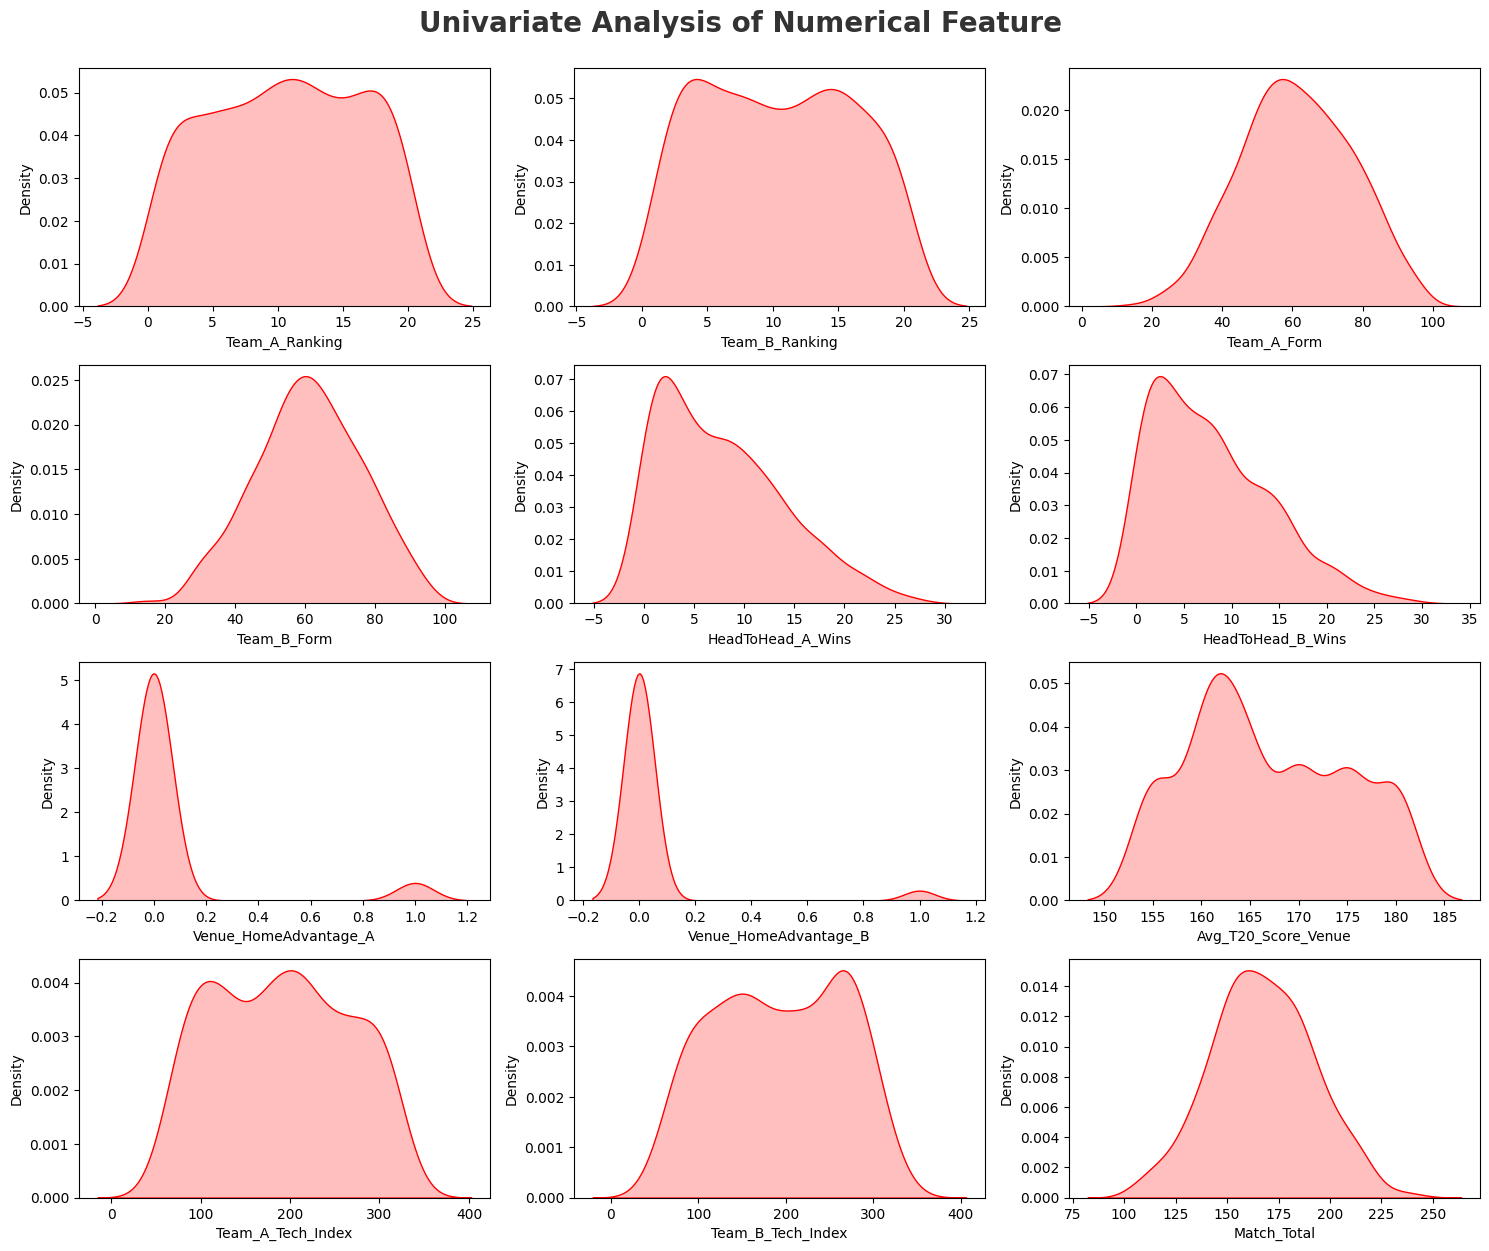

In [ ]:
cols = numeric_df.columns if isinstance(numeric_df, pd.DataFrame) else numeric_df
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Feature ", fontsize=20, fontweight='bold',alpha=0.8,y=1.)
for i, col_name in enumerate(cols):
    plt.subplot(5, 3, i + 1)
    # Use the col_name string directly
    sns.kdeplot(x=df[col_name], fill=True, color='r') 
    plt.xlabel(col_name)
    plt.tight_layout()

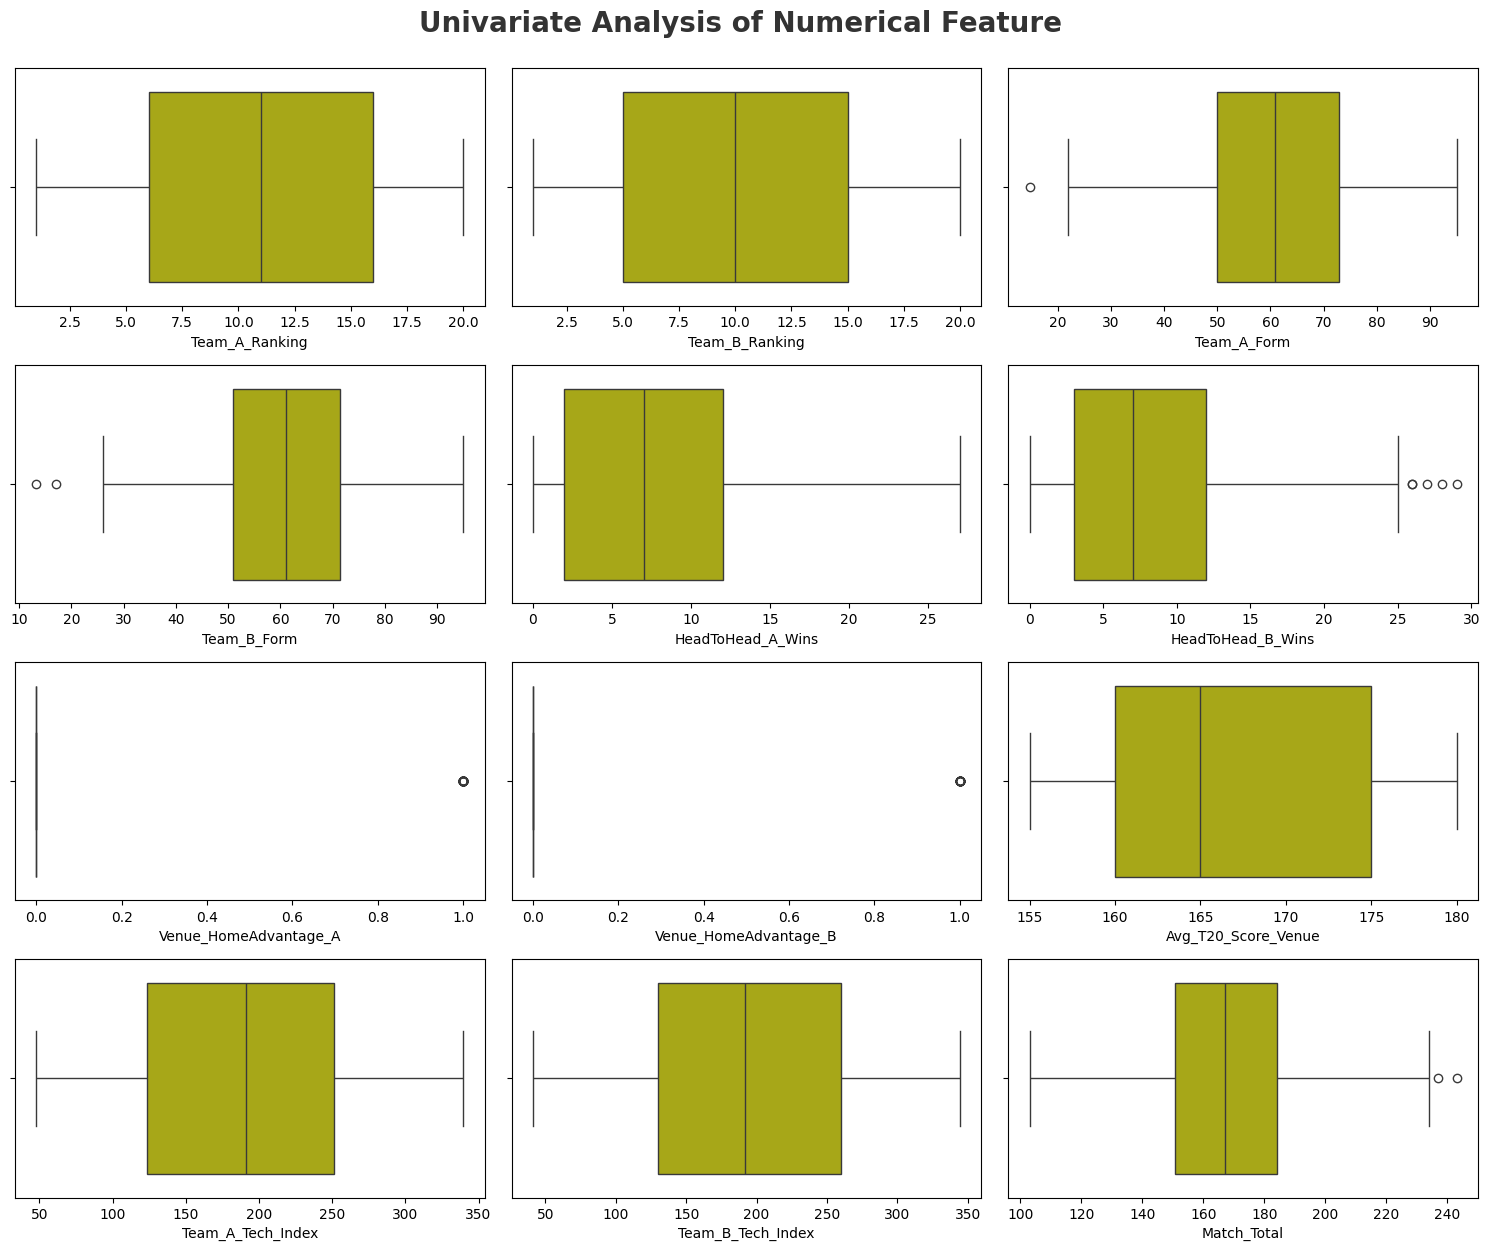

In [23]:
cols = numeric_df.columns if isinstance(numeric_df, pd.DataFrame) else numeric_df
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Feature ", fontsize=20, fontweight='bold',alpha=0.8,y=1.)
for i, col_name in enumerate(cols):
    plt.subplot(5, 3, i + 1)
    # Use the col_name string directly
    sns.boxplot(x=df[col_name], fill=True, color='y') 
    plt.xlabel(col_name)
    plt.tight_layout()

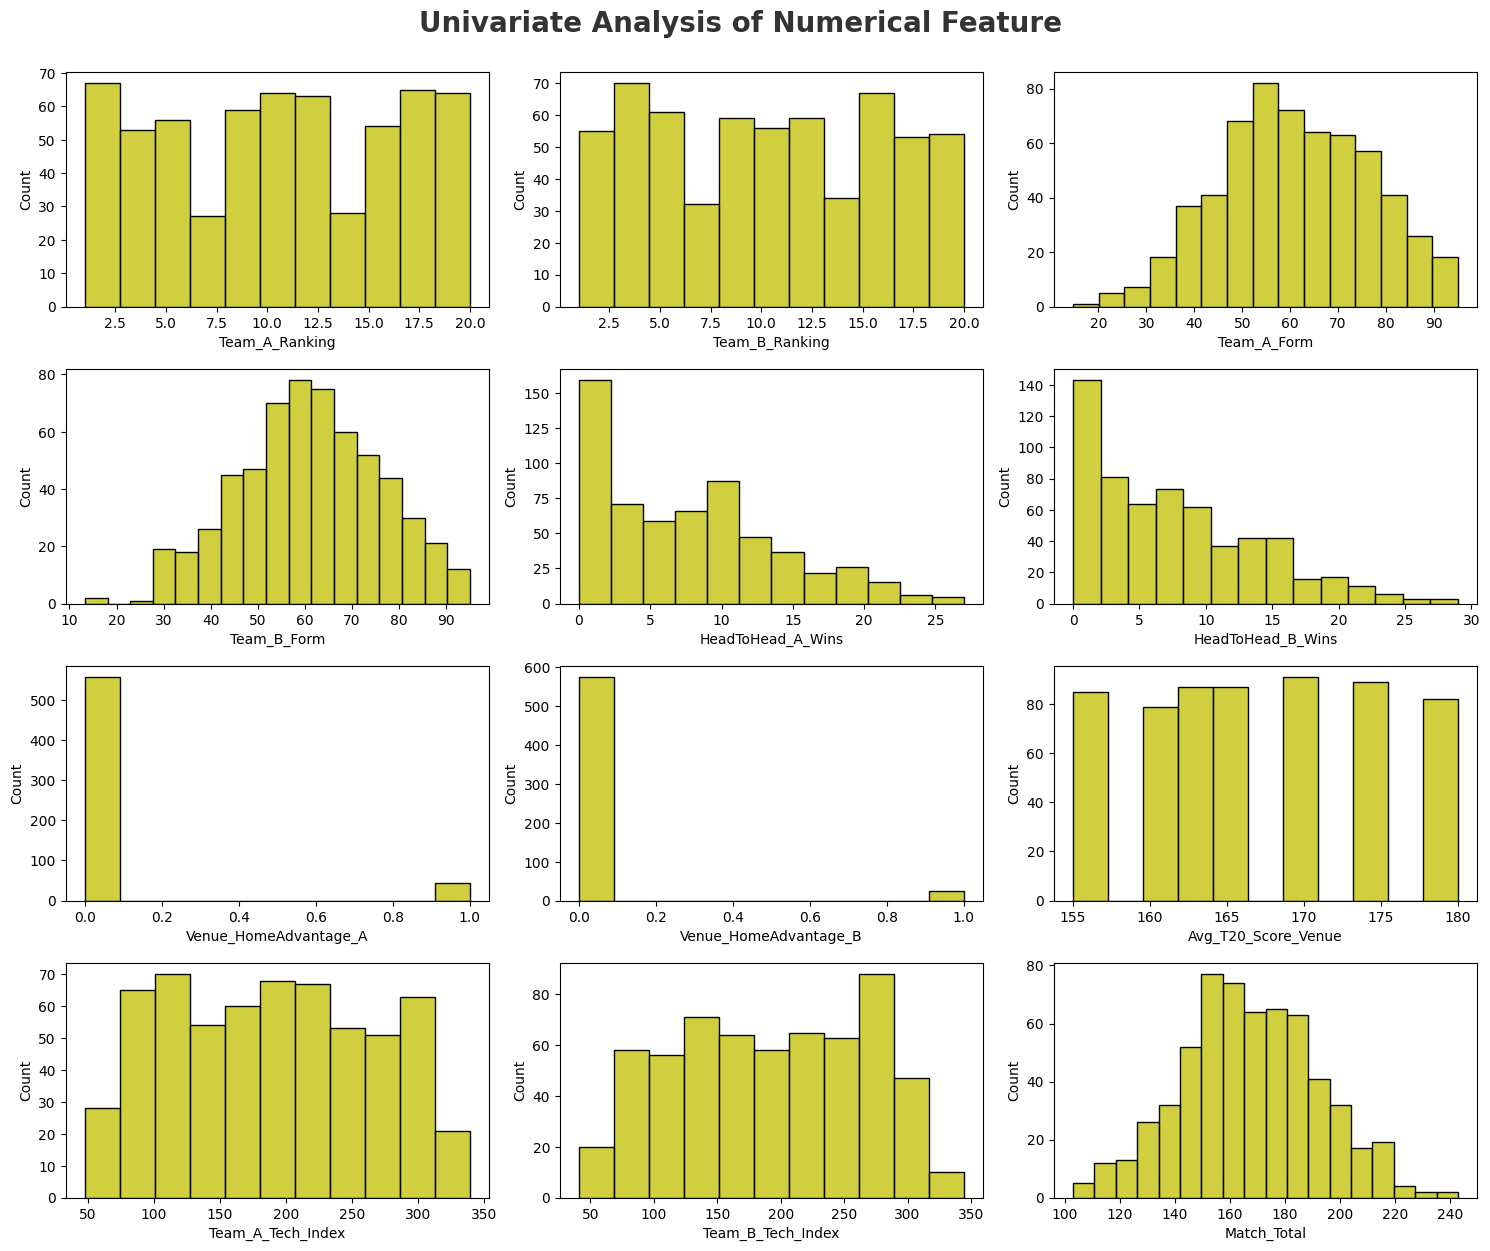

In [26]:
cols = numeric_df.columns if isinstance(numeric_df, pd.DataFrame) else numeric_df
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Feature ", fontsize=20, fontweight='bold',alpha=0.8,y=1.)
for i, col_name in enumerate(cols):
    plt.subplot(5, 3, i + 1)
    # Use the col_name string directly
    sns.histplot(x=df[col_name], fill=True, color='y') 
    plt.xlabel(col_name)
    plt.tight_layout()

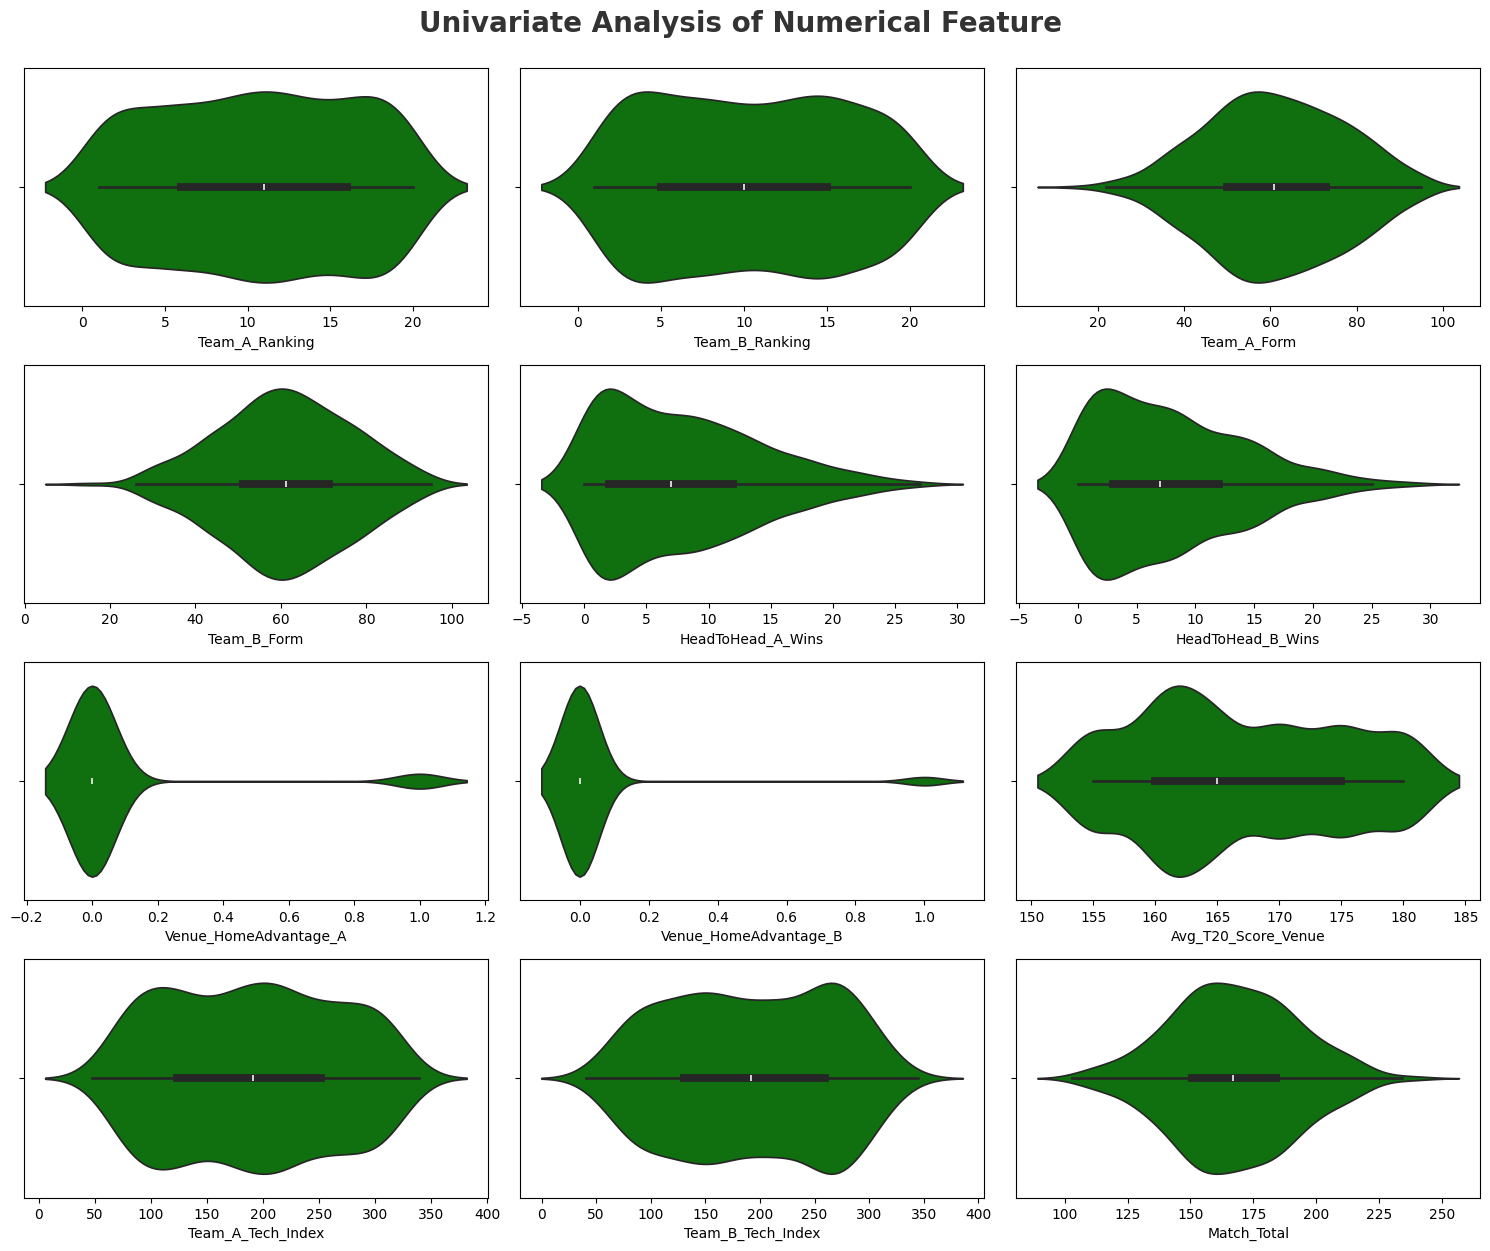

In [29]:
cols = numeric_df.columns if isinstance(numeric_df, pd.DataFrame) else numeric_df
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Feature ", fontsize=20, fontweight='bold',alpha=0.8,y=1.)
for i, col_name in enumerate(cols):
    plt.subplot(5, 3, i + 1)
    # Use the col_name string directly
    sns.violinplot(x=df[col_name], fill=True, color='g') 
    plt.xlabel(col_name)
    plt.tight_layout()

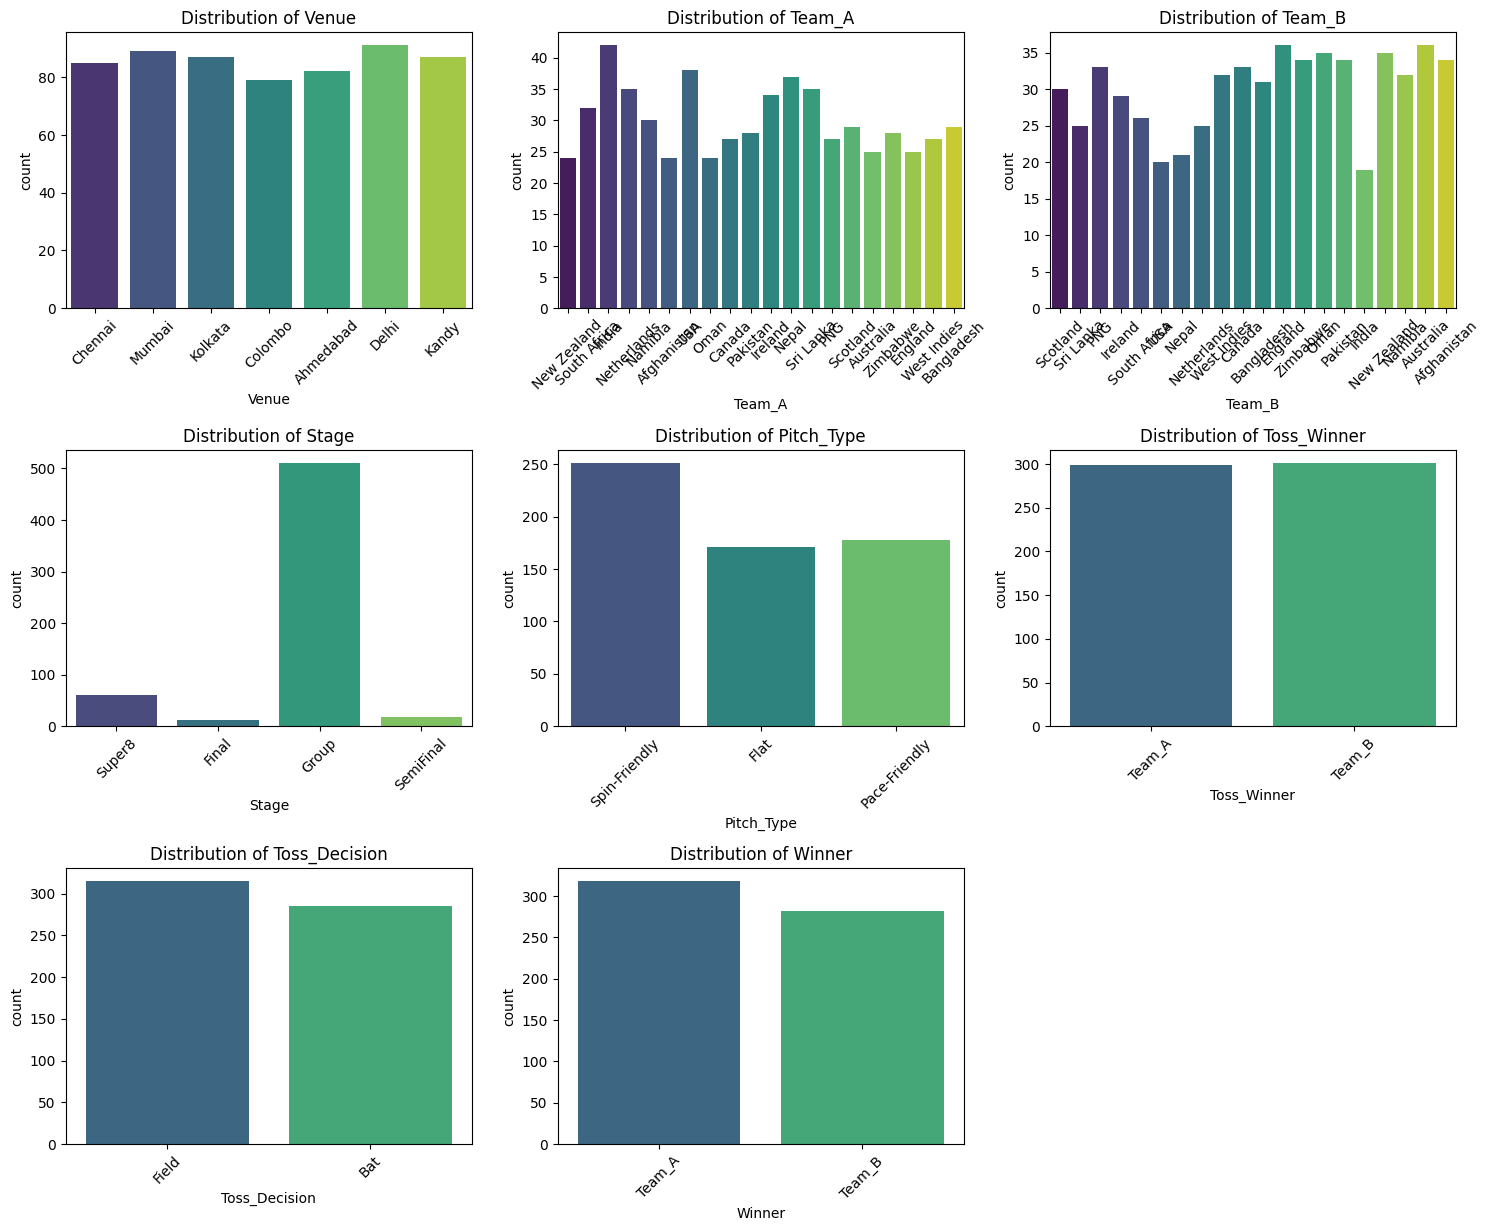

In [33]:
# 1. Pehle sirf categorical columns ko filter karein
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# 2. Figure size set karein (taaki plots clear dikhein)
plt.figure(figsize=(15, 20))

for i, col_name in enumerate(cat_cols):
    plt.subplot(5, 3, i + 1)
    
    # sns.countplot categorical data ke liye best hai
    sns.countplot(data=df, x=col_name, palette='viridis')
    
    # Agar labels bade hain toh unhe rotate kar sakte hain
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col_name}')
    plt.tight_layout()

plt.show()

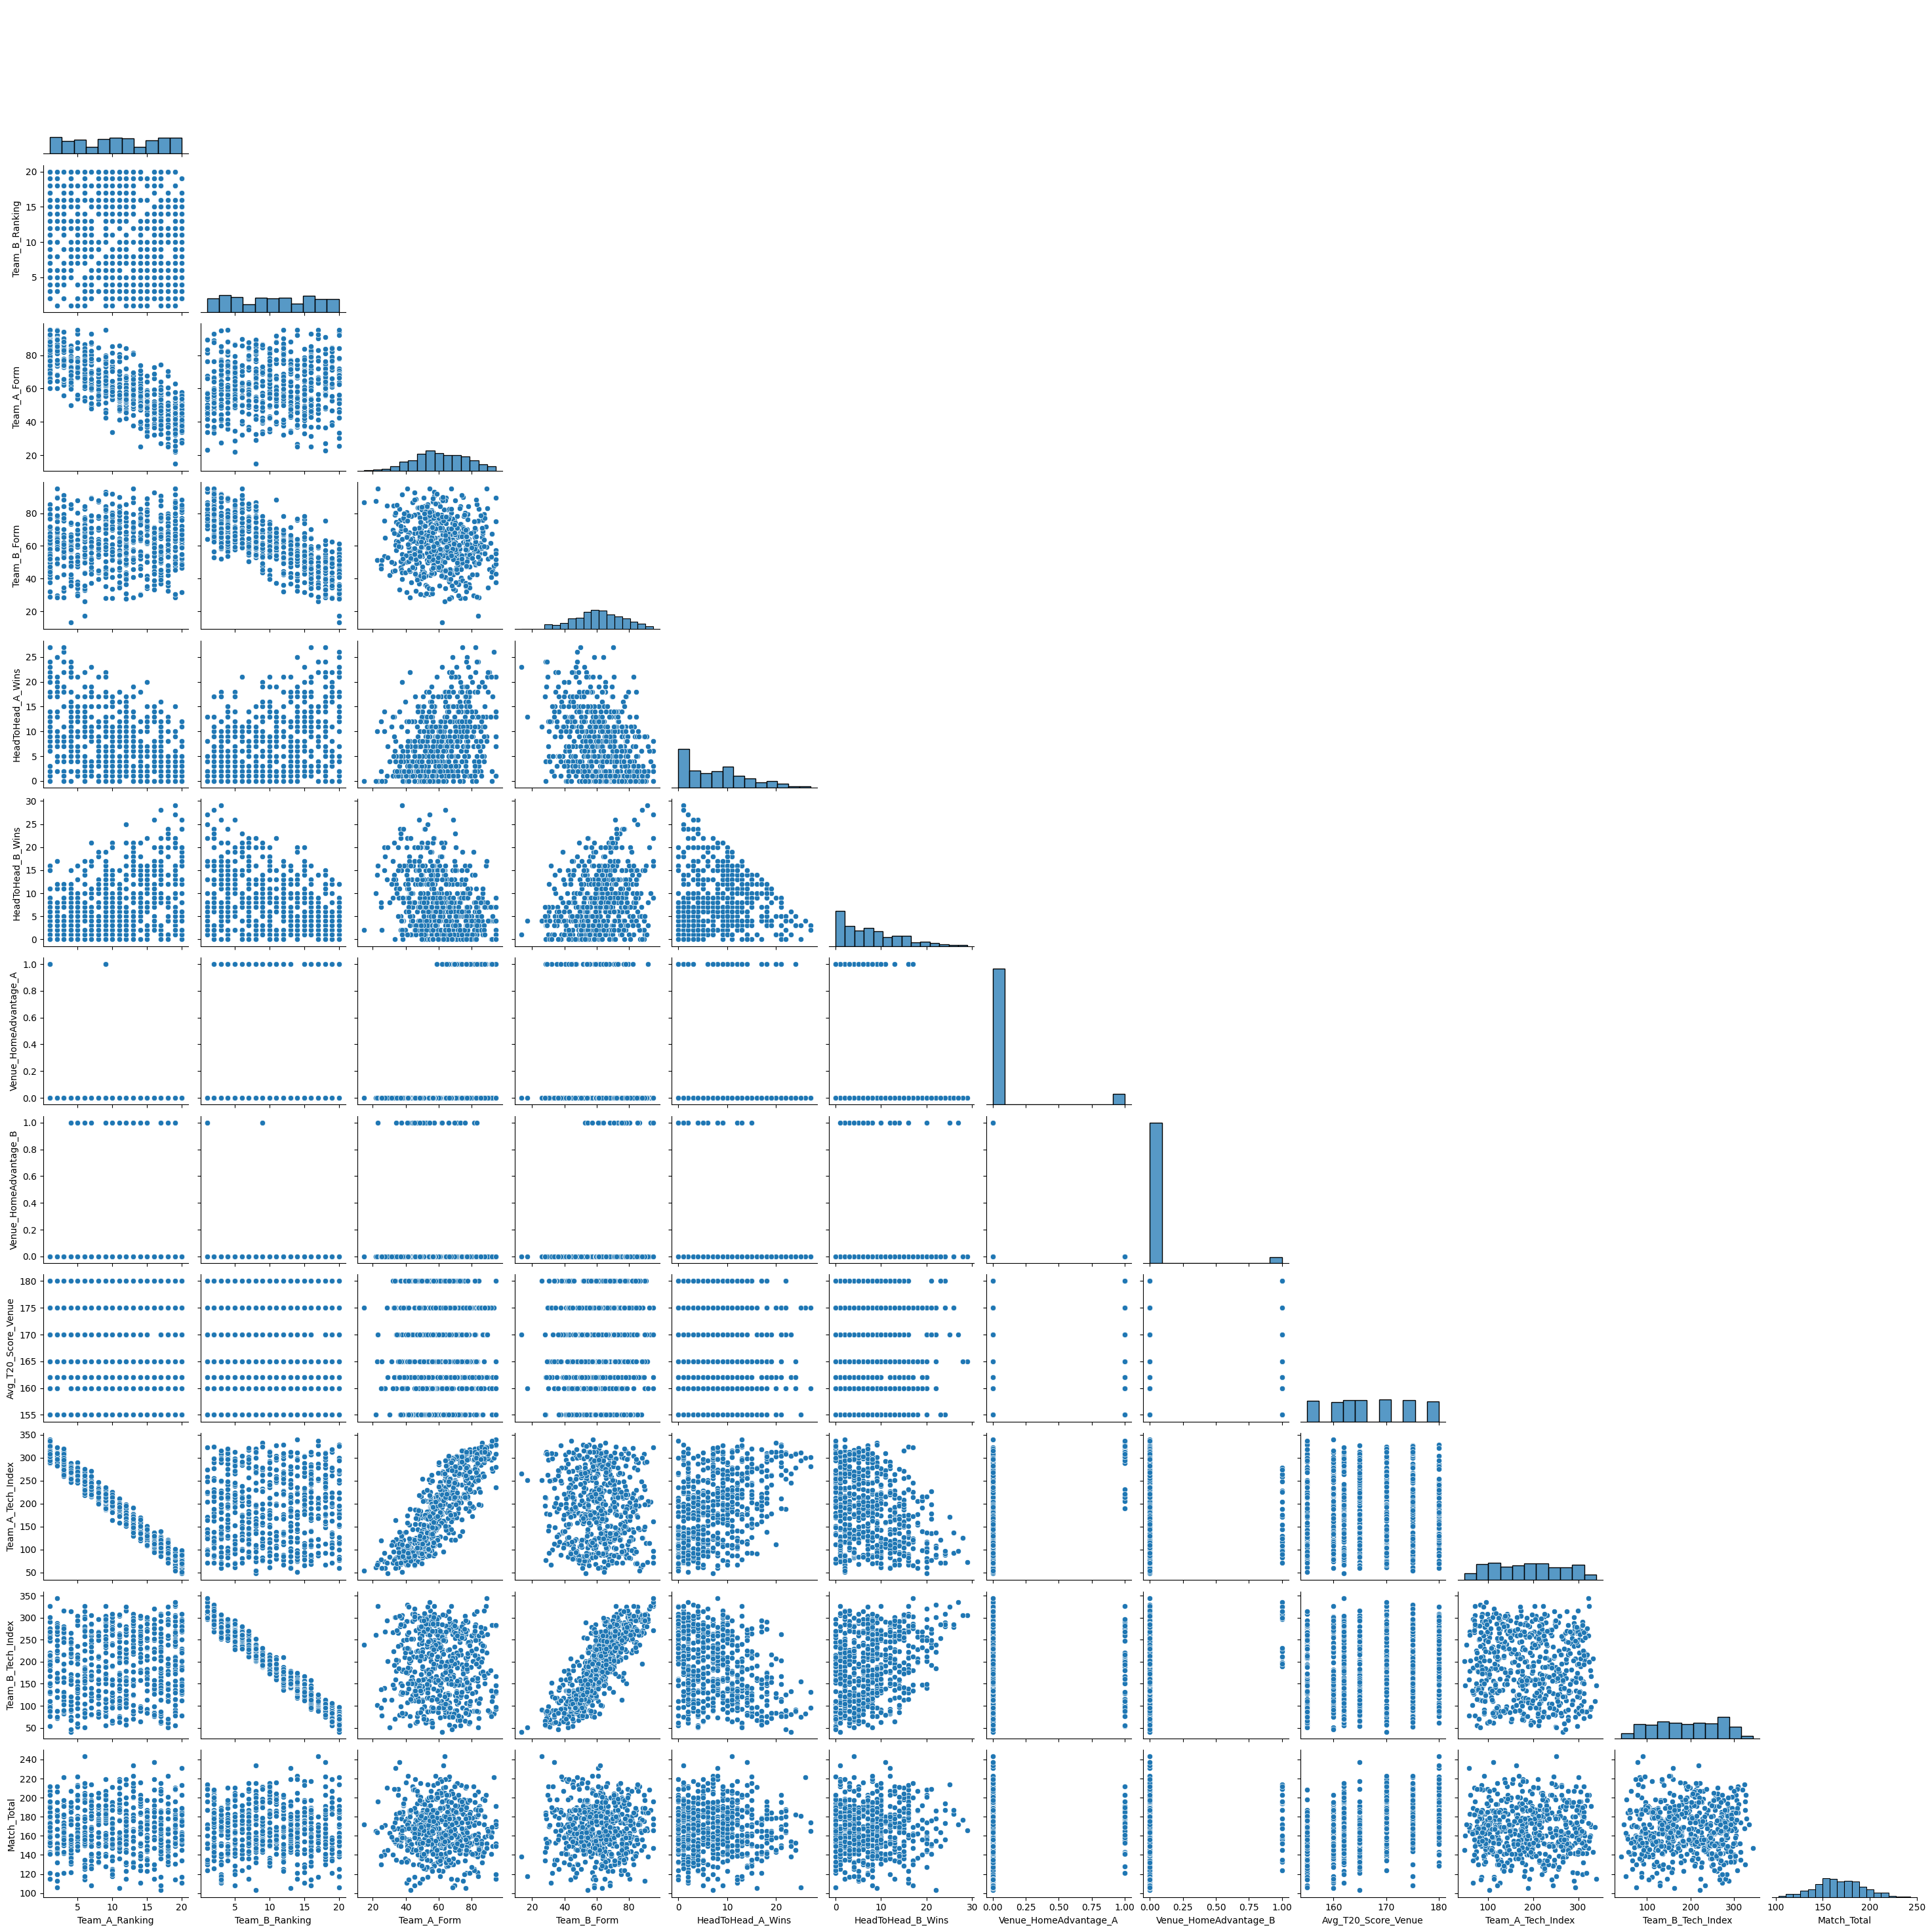

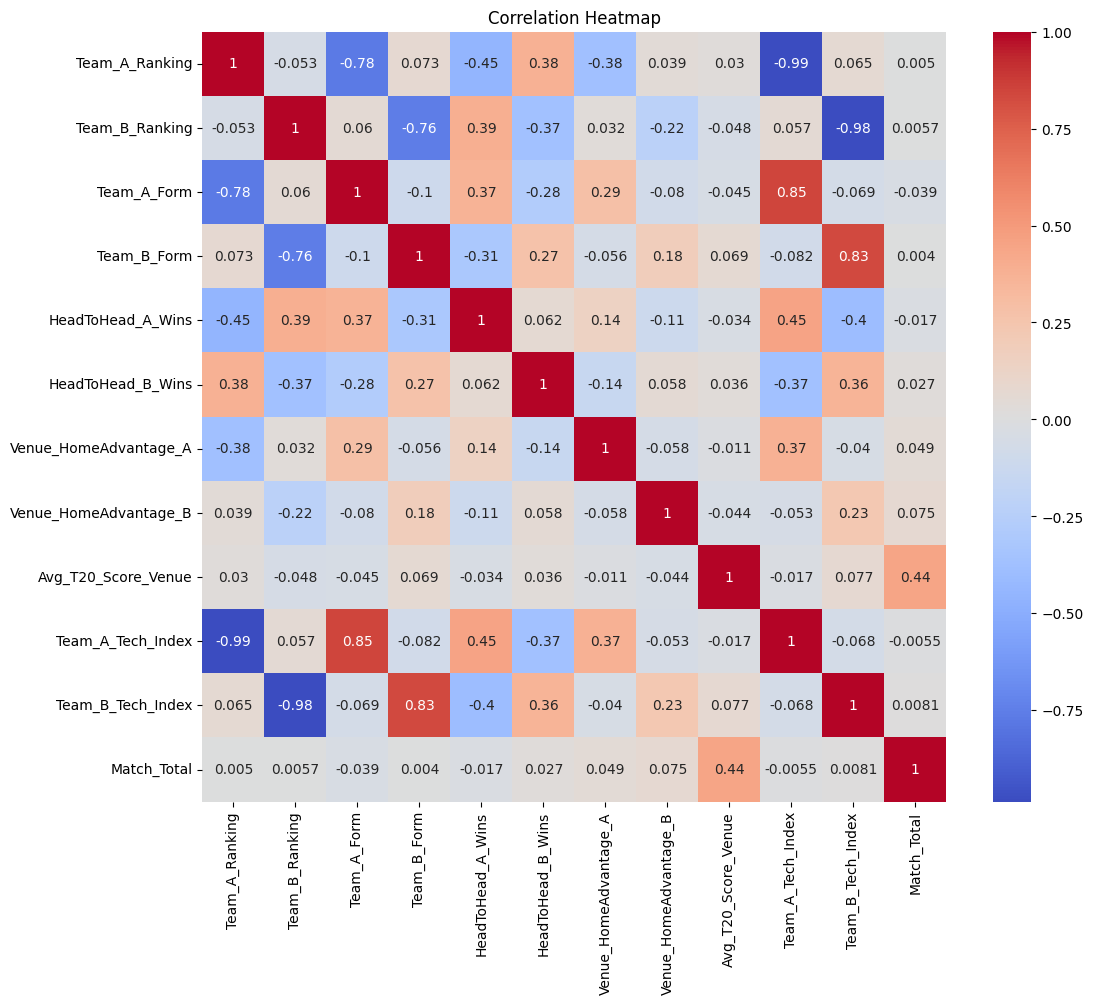

In [35]:
# Multivariate analysis ke liye pairwise relations aur correlations ek saath dekhne ka easy tareeka: Pairplot + Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

cols = numeric_df.columns if isinstance(numeric_df, pd.DataFrame) else numeric_df

# Pairwise relationships (scatter + distributions)
sns.pairplot(df[cols], corner=True)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()